In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
saveFig = False

In [3]:
data = pd.read_excel("https://www.newyorkfed.org/medialibrary/research/interactives/data/oil/OIL_oil-price-dynamics_data.xls",
                    sheet_name = '3_1986-today', skiprows = 18, index_col = 0, parse_dates = True).iloc[:,:4]

# Aggregate to monthly to smooth out daily fluctuations and get prettier plots
#data = data.resample('M').sum()
data.head()

,Price Brent,Demand,Supply,Residual
Date,,,,
1986-01-24,0.000000,0.000000,0.000000,0.000000
1986-01-31,0.197783,0.028568,-0.046270,0.215485
1986-02-07,-0.197814,0.024494,-0.054423,-0.167885
1986-02-14,-0.071070,-0.004536,-0.088737,0.022202
1986-02-21,-0.028811,-0.018470,-0.065694,0.055353


# Drivers of oil price movements since Jun 2022

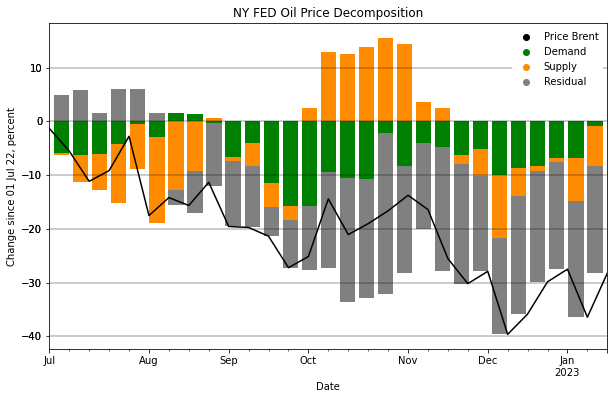

In [4]:
start_date, freq = '7-1-2022', 'W'
colors_dict = {'Price Brent': 'black', 'Demand':'green', 'Supply':'darkorange', 'Residual':'gray'    
}


data_cumsum = data.resample(freq).sum()[start_date:].cumsum().multiply(100)

ax = data_cumsum[['Price Brent']].plot(figsize = (10, 6), color = colors_dict, title = 'NY FED Oil Price Decomposition')
ax.grid(axis = 'y', color = 'black', lw = 0.4)
ax.set_ylabel(f"Change since {pd.to_datetime(start_date).strftime('%d %b %y')}, percent")

ax1 = ax.twiny()
data_cumsum[['Demand', 'Supply', 'Residual']].plot(kind = 'bar', stacked = True,
                                                  width = 0.8, ax = ax1, color = colors_dict)

# Bring line to front
ax.set_zorder(1)
ax.patch.set_visible(False)

ax1.set_xticklabels('')

# Remove frame for second axis
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_visible(False)
    
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
ax1.set_xlabel('')
ax1.get_legend().remove()

# Manually create legend - needed as dual axes mess up stuff
lines = [Line2D([0], [0], color = col, linewidth = 0, marker = 'o') for col in list(colors_dict.values())]

ax.legend(lines, list(colors_dict.keys()), framealpha = 1, edgecolor = 'white', loc = 'best')

if saveFig: plt.savefig('oilpricedecomp.png')

# Drivers of oil price movements since Feb 2022

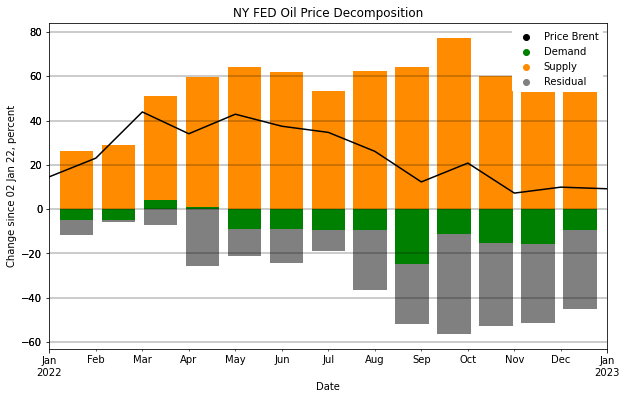

In [5]:
start_date, freq = '1-2-2022', 'M'
colors_dict = {'Price Brent': 'black', 'Demand':'green', 'Supply':'darkorange', 'Residual':'gray'    
}


data_cumsum = data.resample(freq).sum()[start_date:].cumsum().multiply(100)

ax = data_cumsum[['Price Brent']].plot(figsize = (10, 6), color = colors_dict, title = 'NY FED Oil Price Decomposition')
ax.grid(axis = 'y', color = 'black', lw = 0.4)
ax.set_ylabel(f"Change since {pd.to_datetime(start_date).strftime('%d %b %y')}, percent")

ax1 = ax.twiny()
data_cumsum[['Demand', 'Supply', 'Residual']].plot(kind = 'bar', stacked = True,
                                                  width = 0.8, ax = ax1, color = colors_dict)

# Bring line to front
ax.set_zorder(1)
ax.patch.set_visible(False)

ax1.set_xticklabels('')

# Remove frame for second axis
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_visible(False)
    
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
ax1.set_xlabel('')
ax1.get_legend().remove()

# Manually create legend - needed as dual axes mess up stuff
lines = [Line2D([0], [0], color = col, linewidth = 0, marker = 'o') for col in list(colors_dict.values())]

ax.legend(lines, list(colors_dict.keys()), framealpha = 1, edgecolor = 'white', loc = 'best')
if saveFig: plt.savefig('oilpricedecomp.png')